In [4]:

from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize
from keras.preprocessing.text import text_to_word_sequence
from gensim.utils import tokenize
import pandas as pd
from matplotlib import pyplot as plt
from nltk import pos_tag
import seaborn as sns
import nltk,string
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from spacy.lang.en import English
import spacy
nlp = spacy.load('en_core_web_sm')
from nltk.stem.wordnet import WordNetLemmatizer

from transformers import pipeline
import yake

ModuleNotFoundError: No module named 'tensorflow.python'

In [6]:

text_origial = ("I recently had an exceptional experience with the customer service team at XYZ Company. I "
"had an issue with a product I purchased, and their support team went above and beyond to "
"assist me. Their response was prompt and courteous, and they resolved my problem quickly "
"and efficiently. The agent I interacted with was knowledgeable, patient, and genuinely seemed "
"to care about resolving my issue. It's rare to encounter such top-notch customer service these "
"days, and I was truly impressed with their professionalism and dedication. I highly recommend "
"XYZ Company's customer service to anyone in need of assistance.")
text = text_origial.lower()

## Tokenization

### Going to create a dict to hold the corpus' for analysis later on

In [7]:
all_corpus = {'simple_split_corpus':[],'NLTK_word_corpus':[],'NLTK_word_punc_corpus':[],'spacey_corpus':[],'keras_corpus':[],'gensim_corpus':[]}

### Simple tokenization with .split

In [8]:
all_corpus['simple_split_corpus'] = text.split(" ") #Splits the text on each space in the

### Tokenization by word in NLTK

In [9]:
all_corpus['NLTK_word_corpus'] = word_tokenize(text)

### Tokenization by words and punctuation in NLTK

In [10]:
all_corpus['NLTK_word_punc_corpus'] = wordpunct_tokenize(text)

### Tokenization by sentence in NLTK

In [11]:
# all_corpus['sentence_corpus'] = sent_tokenize(text)

### Specific Spacey Tokenization 

In [12]:
nlp = English()
my_doc = nlp(text)
for token in my_doc:
    all_corpus['spacey_corpus'].append(token.text)

### Specific Keras Tokenization 

In [13]:
all_corpus['keras_corpus'] = text_to_word_sequence(text)

### Specific Gensim Tokenization 

In [14]:
all_corpus['gensim_corpus'] = list(tokenize(text))

## Taking a look at each corpus

In [15]:
for name,corpus in all_corpus.items():
    print(F'The {name} has:\n')
    print(F'\tCharacters: {len(corpus)}\n')

The simple_split_corpus has:

	Characters: 98

The NLTK_word_corpus has:

	Characters: 111

The NLTK_word_punc_corpus has:

	Characters: 115

The spacey_corpus has:

	Characters: 113

The keras_corpus has:

	Characters: 99

The gensim_corpus has:

	Characters: 101



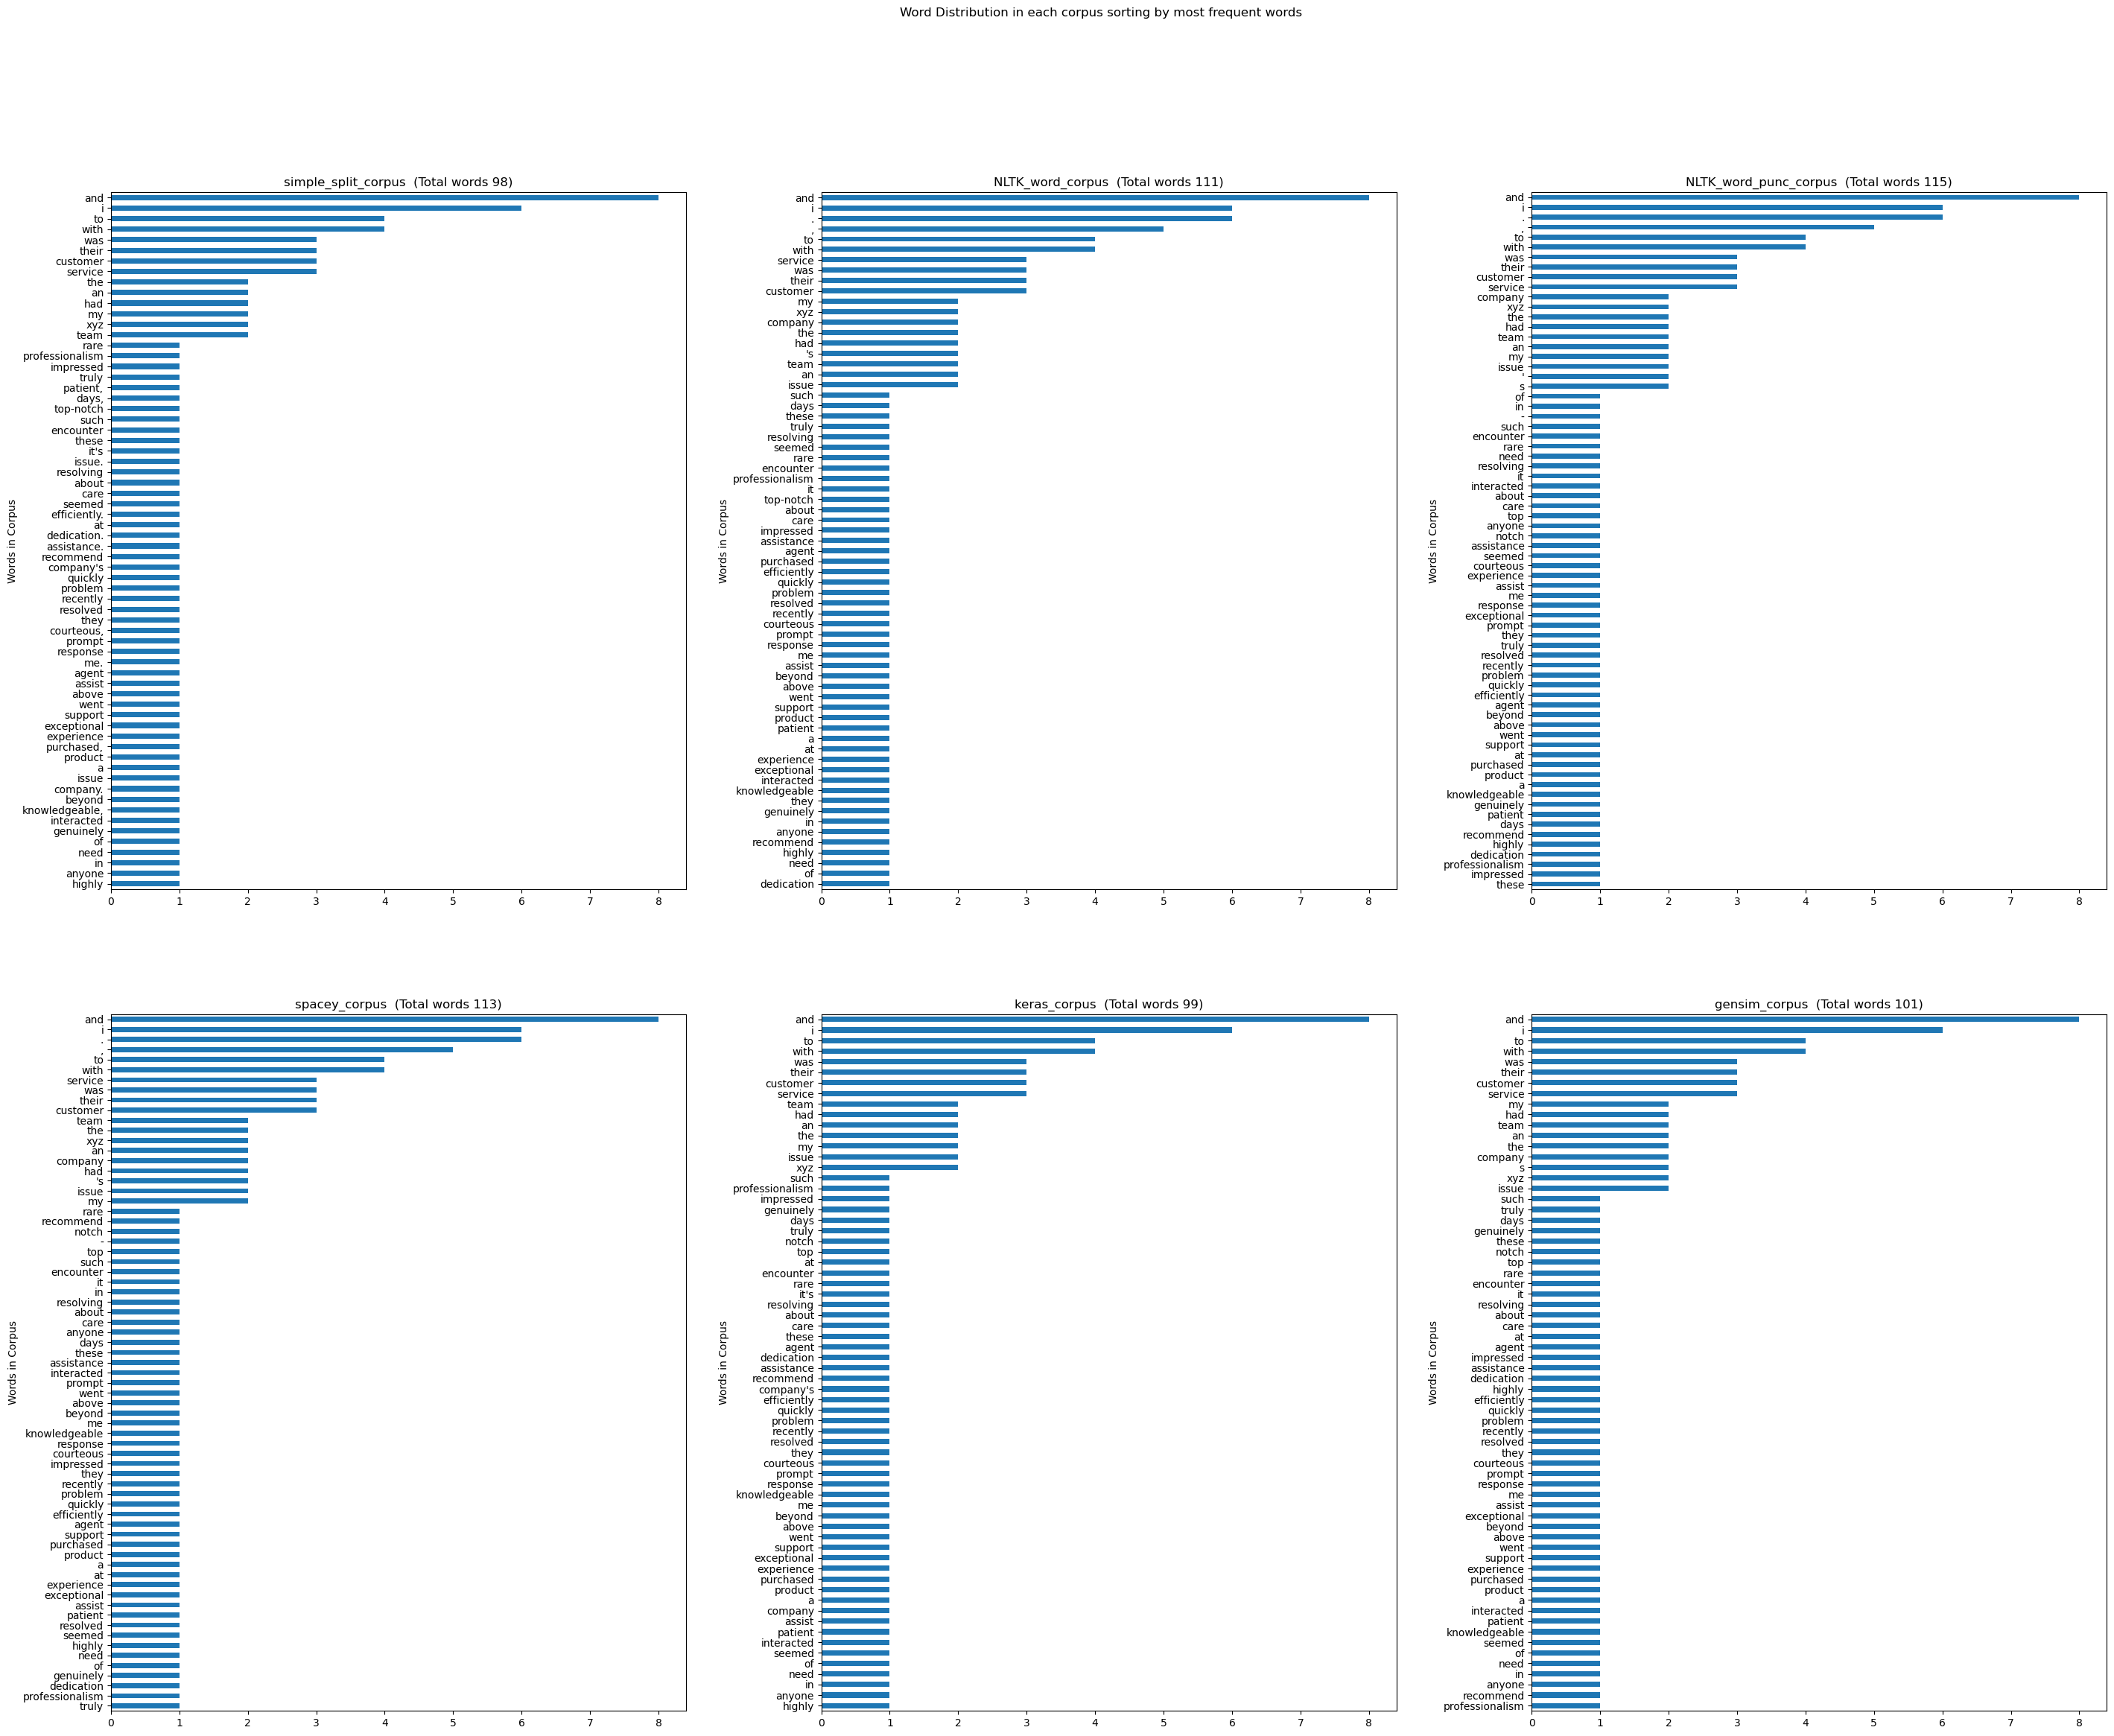

In [16]:
plt.rcParams["figure.figsize"] = [30, 25]
fig, axis = plt.subplots(2, 3)
fig.suptitle('Word Distribution in each corpus sorting by most frequent words')
plt.tight_layout(pad=10)

for i,corpus in enumerate(all_corpus.items()):
    # print(F'The {name} has the foll:\n')
    # print(pd.Series(corpus[1]).sort_values())
    pd.Series(corpus[1]).value_counts().sort_values(ascending=True).plot(kind = 'barh',ax=axis[i//3,i%3],title=F'{corpus[0]}  (Total words {len(corpus[1])})',ylabel=F"Words in Corpus")


In [17]:
# plt.rcParams["figure.figsize"] = [30, 25]
# fig, axis = plt.subplots(2, 3)
# fig.suptitle('Word Distribution in each corpus sorting by alphabetical order')
# plt.tight_layout(pad=10)

# for i,corpus in enumerate(all_corpus.items()):
#     # print(F'The {name} has the foll:\n')
#     print(pd.DataFrame(corpus[1]).value_counts().sort_index())
#     # pd.Series(corpus[1],columns=['Words']).value_counts().so.plot(kind = 'barh',ax=axis[i//3,i%3],title=F'{corpus[0]}  (Total words {len(corpus[1])})',ylabel=F"Words in Corpus")


#### Observing the different corpus' shows that they generally differ according to whether punctuation was included or not and how it dealt with apostrophes.

TODO: Bigram and Trigram tokenization

## Sentence Segmentation

In [18]:
sentence_corpus = sent_tokenize(text)
sentence_corpus

['i recently had an exceptional experience with the customer service team at xyz company.',
 'i had an issue with a product i purchased, and their support team went above and beyond to assist me.',
 'their response was prompt and courteous, and they resolved my problem quickly and efficiently.',
 'the agent i interacted with was knowledgeable, patient, and genuinely seemed to care about resolving my issue.',
 "it's rare to encounter such top-notch customer service these days, and i was truly impressed with their professionalism and dedication.",
 "i highly recommend xyz company's customer service to anyone in need of assistance."]

## Part-of-Speech Tagging

#### To do the Part-of-Speech Tagging I am going to be using the spacey and Keras corpus as one includes punctuation while the other includes only the words, to ensure we capture any variation between different token sets.

In [19]:
pos_spacey = pos_tag(all_corpus['spacey_corpus'])
pos_keras = pos_tag(all_corpus['keras_corpus'])

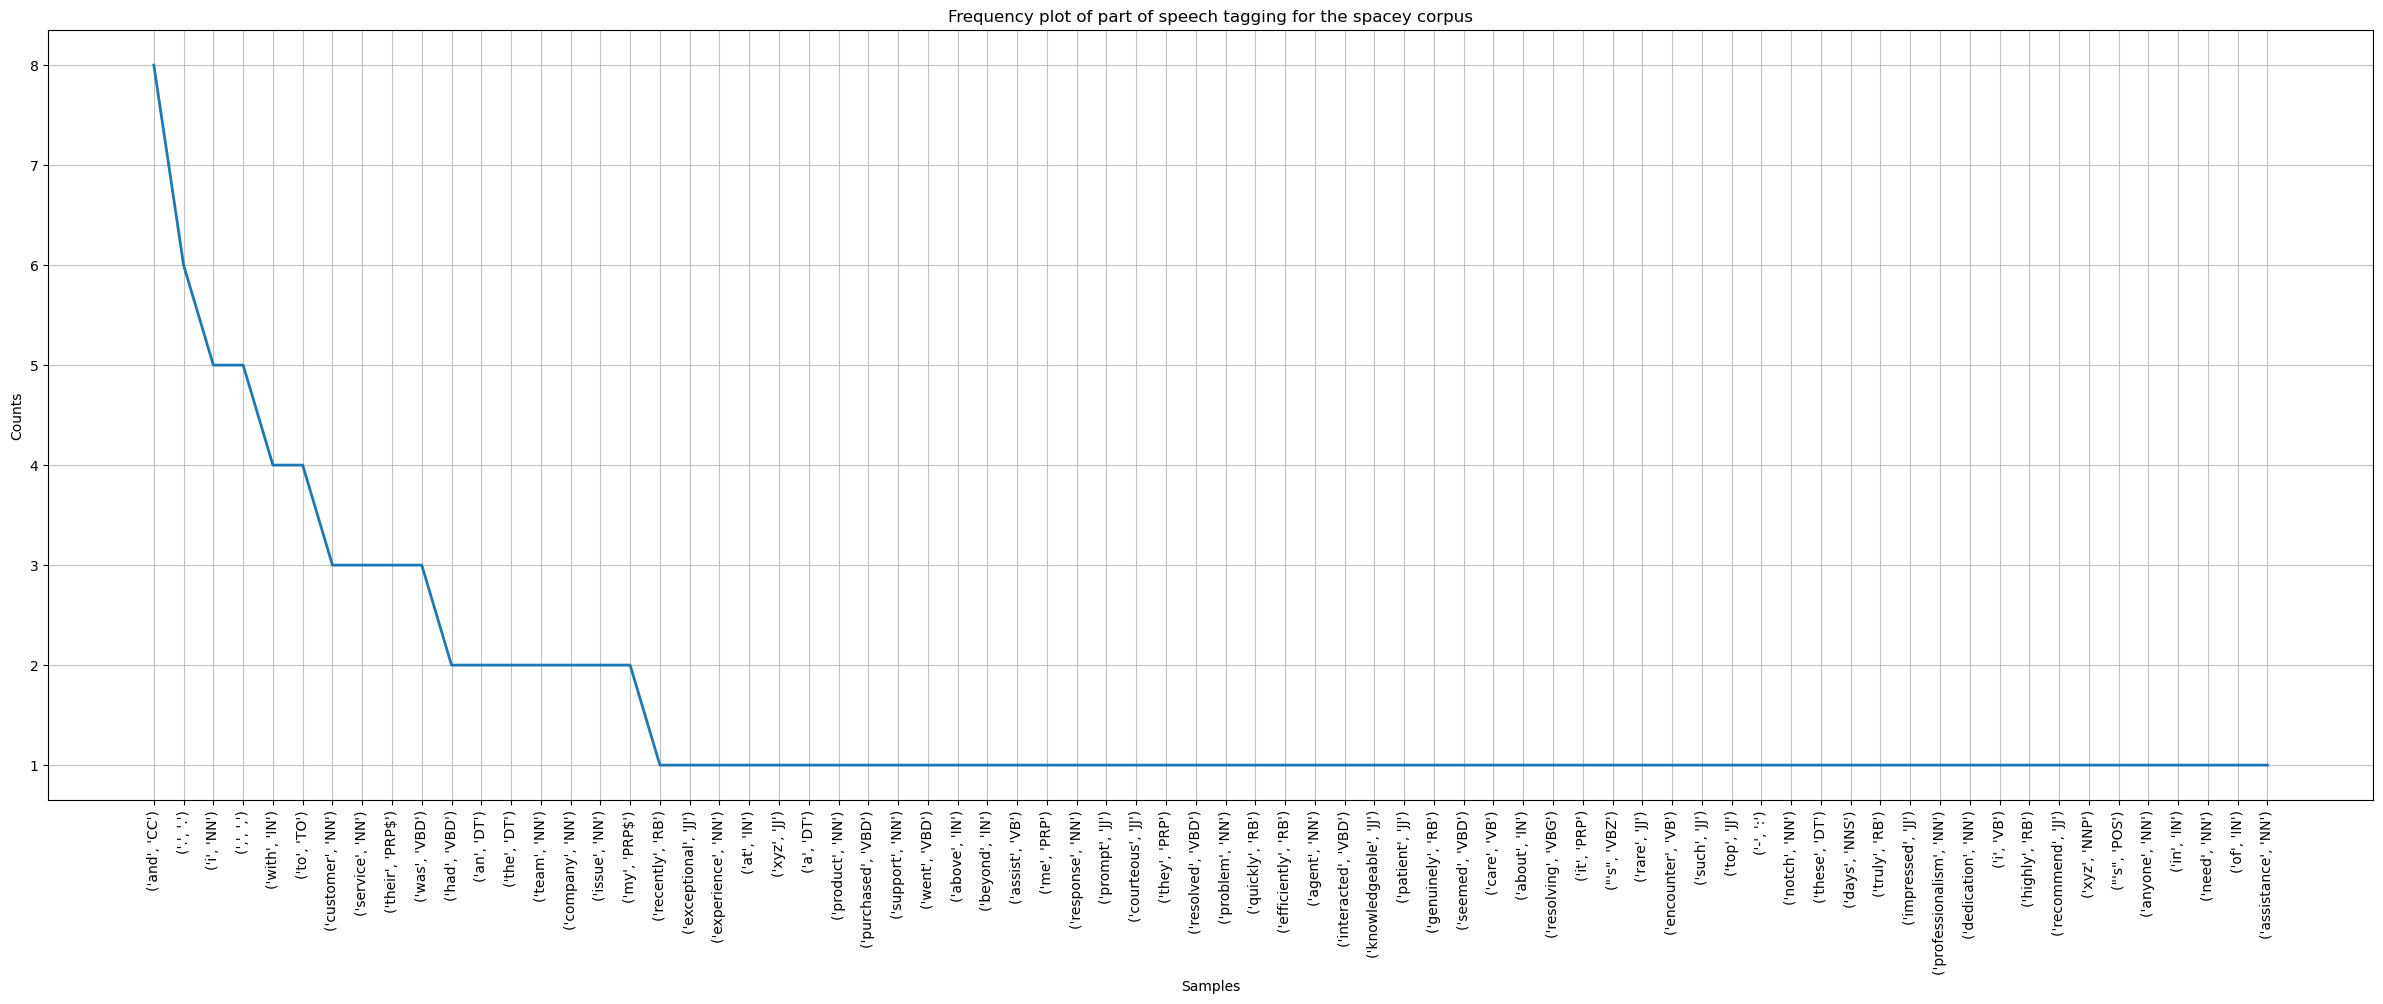

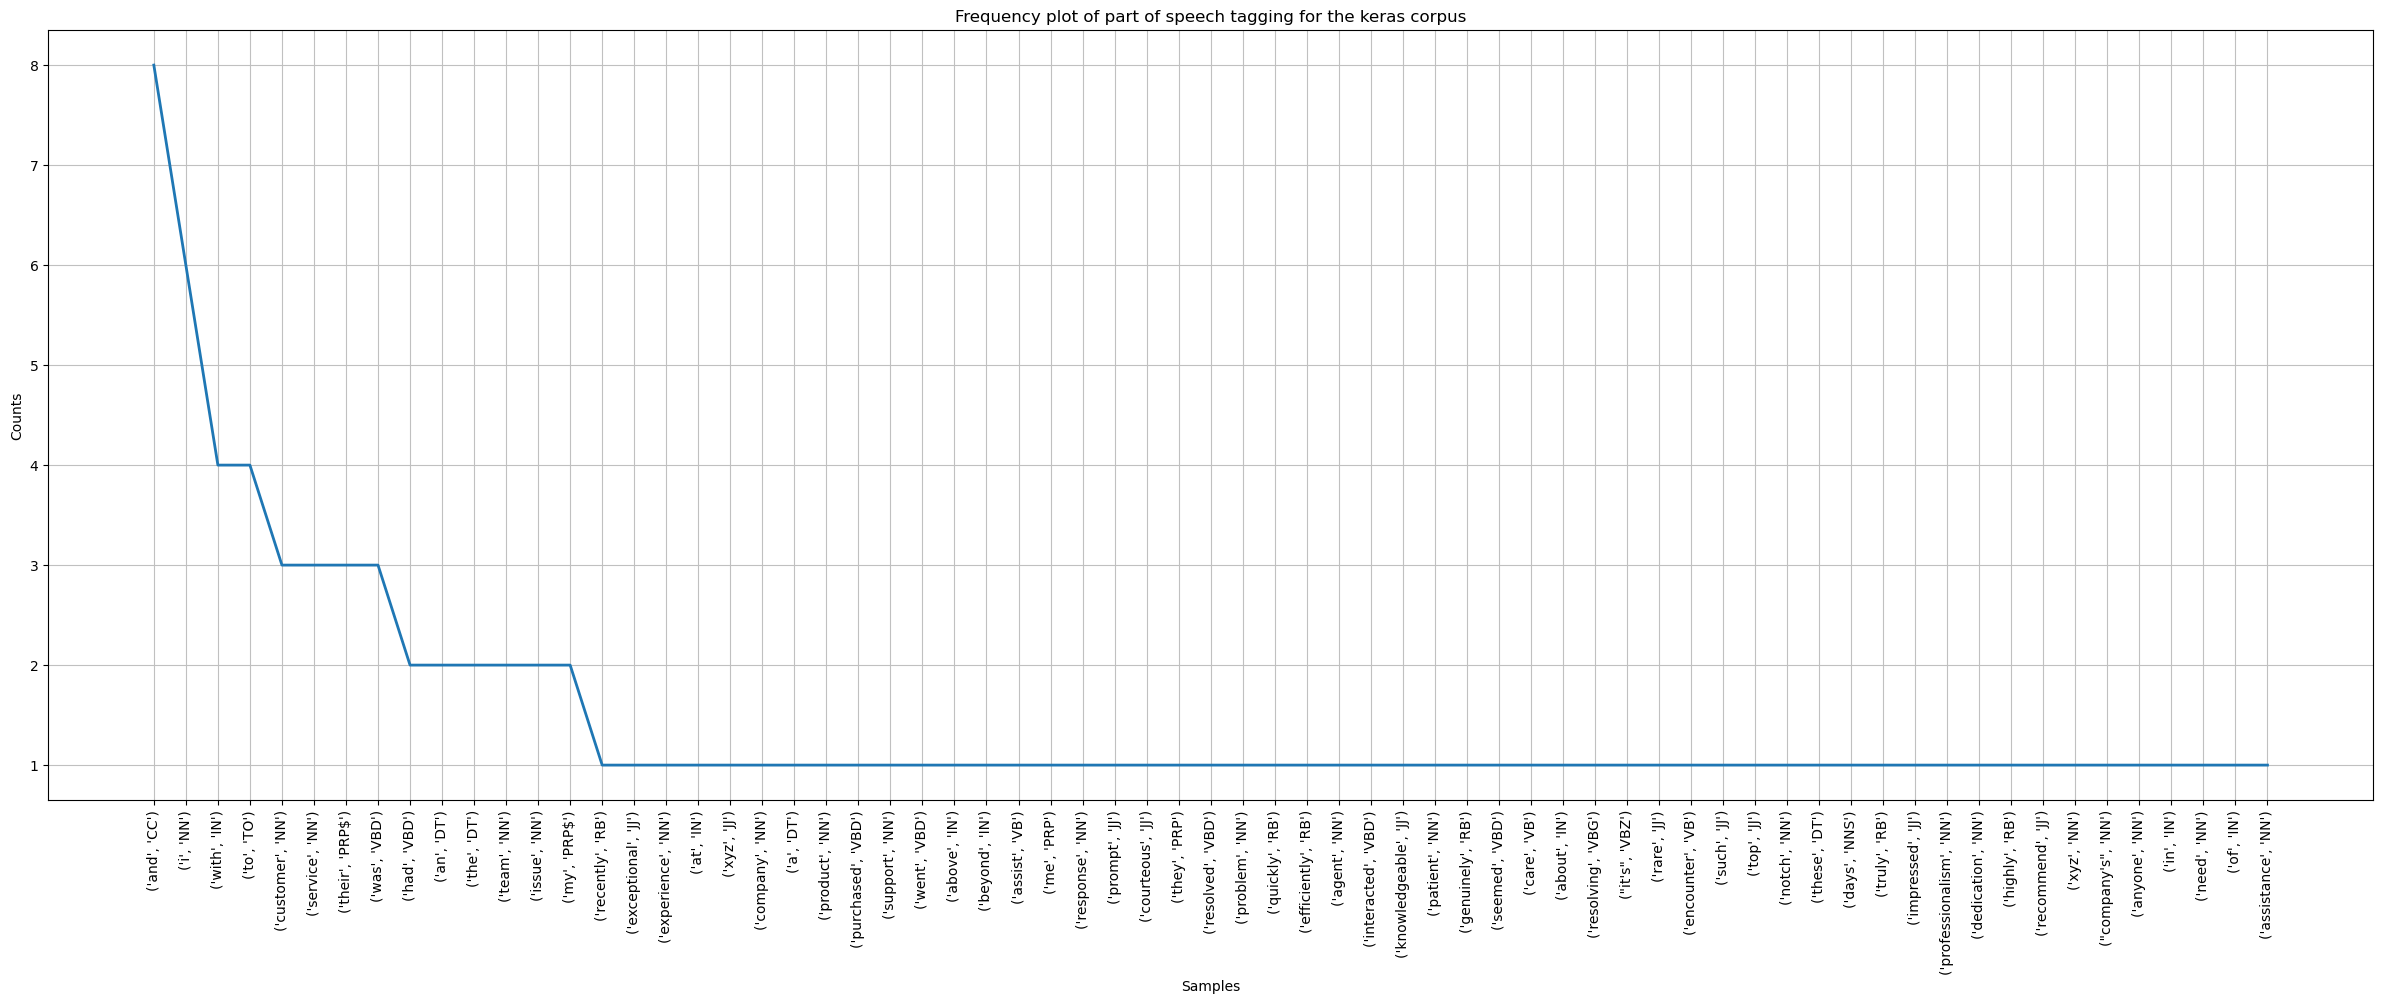

<Axes: title={'center': 'Frequency plot of part of speech tagging for the keras corpus'}, xlabel='Samples', ylabel='Counts'>

In [20]:
plt.rcParams["figure.figsize"] = [30, 10]
spacey_fd = nltk.FreqDist(pos_spacey)
spacey_fd.plot(title="Frequency plot of part of speech tagging for the spacey corpus")
plt.show()
keras_fd = nltk.FreqDist(pos_keras)
keras_fd.plot(title="Frequency plot of part of speech tagging for the keras corpus")

In [21]:
pos_dict = {}
for item in pos_keras:
    pos_dict[item[1]] = pos_dict.get(item[1],0) + 1


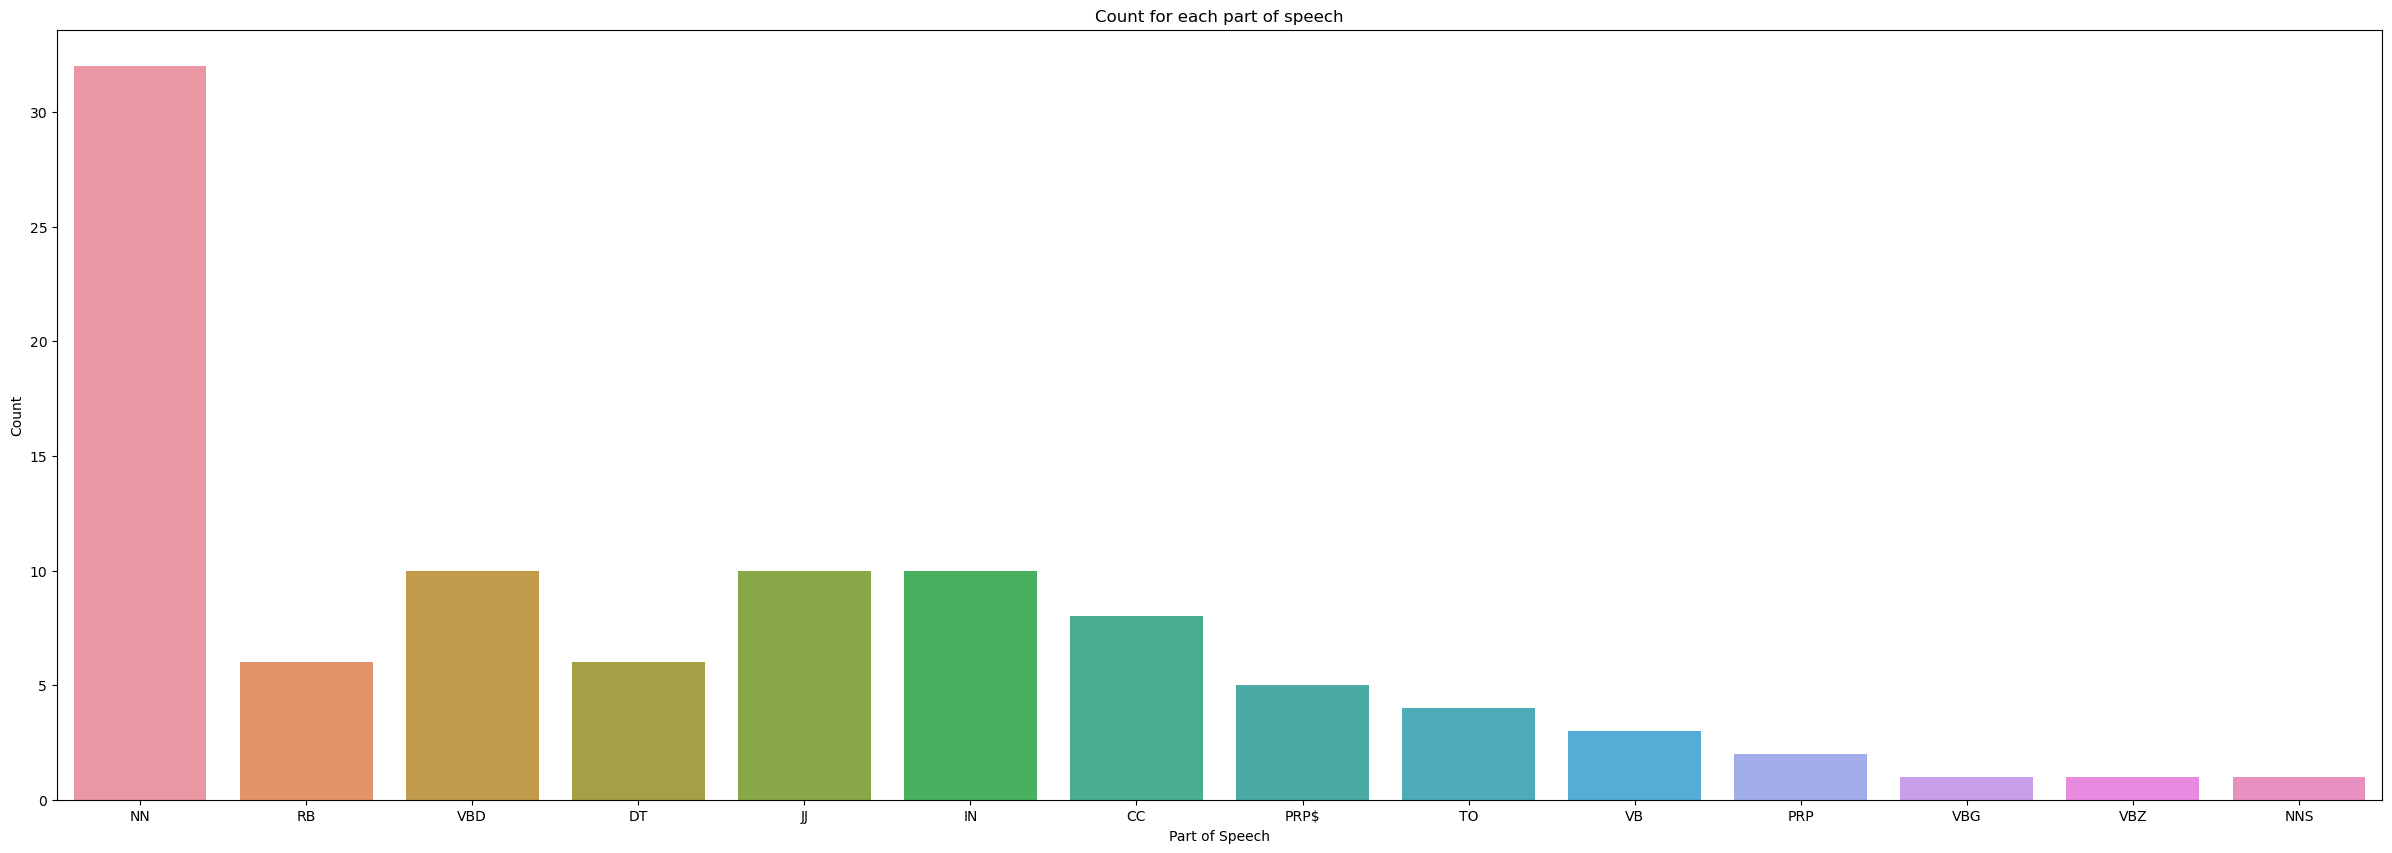

In [22]:
sns.barplot(x = list(pos_dict.keys()), y = list(pos_dict.values()))
plt.xlabel("Part of Speech")
plt.ylabel("Count")
plt.title("Count for each part of speech")
plt.show()

### Analysing the parts of speech making up this text , I notice there are a majority of nouns(NN)followed by a lot of verb past tense(VBD), Adjectives(JJ) and preposition/subordinating conjunction(IN)

## Setting up a pre-processing pipeline

Creating a function to do preprocessing on the text for each of the following tasks

In [23]:
def preprocess_pipeline(corpus_choice, remove_stop_words = False, normalize_words = False, remove_noise = False):

	corpus = all_corpus[corpus_choice]
	tokens = pos_tag(corpus)
 
	stop_words = stopwords.words('english')
	lemmatizer = WordNetLemmatizer()
 
	result_tokens = []

	for token,tag in tokens:

		if remove_stop_words and token in stop_words:
			continue
    
		if normalize_words:
			if tag.startswith("NN"):
				pos = 'n'
			elif tag.startswith('VB'):
				pos = 'v'
			else:
				pos = 'a'
			token = lemmatizer.lemmatize(token, pos)
   
		if remove_noise and token in string.punctuation:
			continue
    
		result_tokens.append(token)

			
	return result_tokens
    

## Named Entity Recognition(NER)

In [24]:
for sent in nltk.sent_tokenize(text_origial):
	for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
		if hasattr(chunk, 'label'):
			print(chunk.label(), ' '.join(c[0] for c in chunk))

ORGANIZATION XYZ Company
ORGANIZATION XYZ Company


#### Here I see that 1 entity was detected twice in text, the XYZ company which is correct.

## Sentiment Analysis

#### I will use the hugging face library once again, and the bert-base-multilingual-uncased model as it was trained on product reviews which is most similar to the text here.

In [25]:
specific_model = pipeline('sentiment-analysis',model="distilbert-base-uncased-finetuned-sst-2-english")

In [26]:
specific_model(text_origial) # On the original text without any preprocessing

[{'label': 'POSITIVE', 'score': 0.9998216032981873}]

In [27]:
keras_tokens = preprocess_pipeline('keras_corpus')
joined_text = ' '.join(keras_tokens)
specific_model(joined_text)

[{'label': 'POSITIVE', 'score': 0.9998124241828918}]

In [28]:
keras_tokens = preprocess_pipeline('keras_corpus',True,True,True) # Here I am applying all preprocessing
joined_text = ' '.join(keras_tokens)
specific_model(joined_text)

[{'label': 'POSITIVE', 'score': 0.9992616772651672}]

#### Here it is clear that the text has a postive sentiment, regardless of how the text is preprocessed.

##  Keyword Extraction

First using the spacy library

In [29]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_origial)
print("The keywords found(without any preprocessing) by the spacey implementation are: " ,doc.ents)

The keywords found(without any preprocessing) by the spacey implementation are:  (XYZ Company, these days, XYZ Company's)


Yake implementation


In [30]:
kw_extractor = yake.KeywordExtractor()
text = """spaCy is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion."""
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 10
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text_origial)

for kw in keywords:
	print(kw)

('exceptional experience', 0.028200576712784108)
('XYZ Company customer', 0.030613859917021466)
('XYZ Company', 0.031976526497815426)
('recommend XYZ Company', 0.05102233482799679)
('Company customer service', 0.055252373539433665)
('customer service team', 0.057868576525829565)
('customer service', 0.06454463078957896)
('Company customer', 0.10956652030075738)
('service team', 0.11450159062848955)
('support team', 0.11617871014594831)


From the above we can see that XYZ Company seems to be an important keyword that was picked up. I did try and run the text through preprocessing but found that this decreased the quality of the results

##  Word Frequency Analysis

In [31]:
frequency = nltk.FreqDist(all_corpus['simple_split_corpus'])
max_frequency = max(frequency.values())

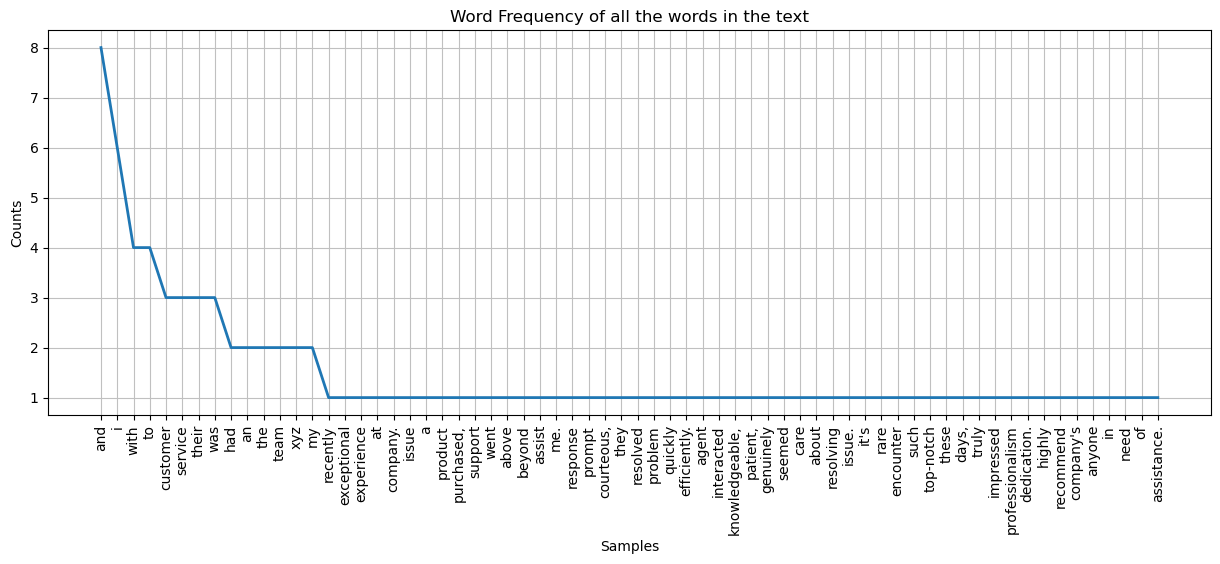

In [32]:
plt.rcParams["figure.figsize"] = [15, 5]

_ = frequency.plot(title="Word Frequency of all the words in the text")

However this included stop words so here are the plots without stop words.

In [33]:
tokens = preprocess_pipeline('simple_split_corpus',True,False,True) # Here I am applying all preprocessing
frequency = nltk.FreqDist(tokens)
frequency_normalized = nltk.FreqDist(tokens)
max_frequency = max(frequency.values())

for word in frequency.keys():
    frequency_normalized[word] = frequency[word]/max_frequency

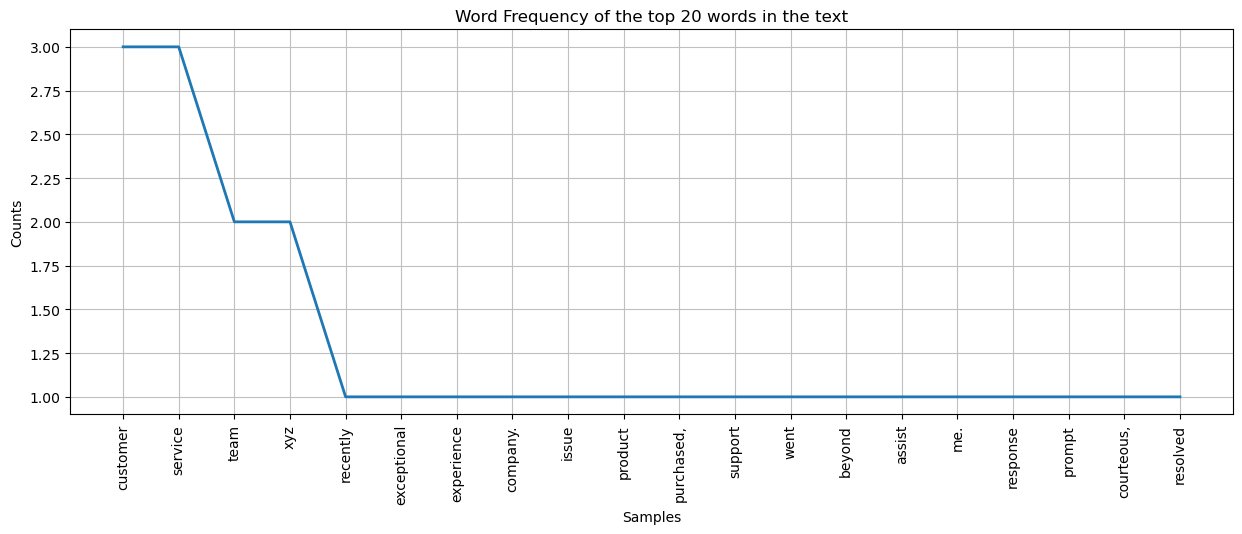

In [34]:
_ = frequency.plot(20, title="Word Frequency of the top 20 words in the text")

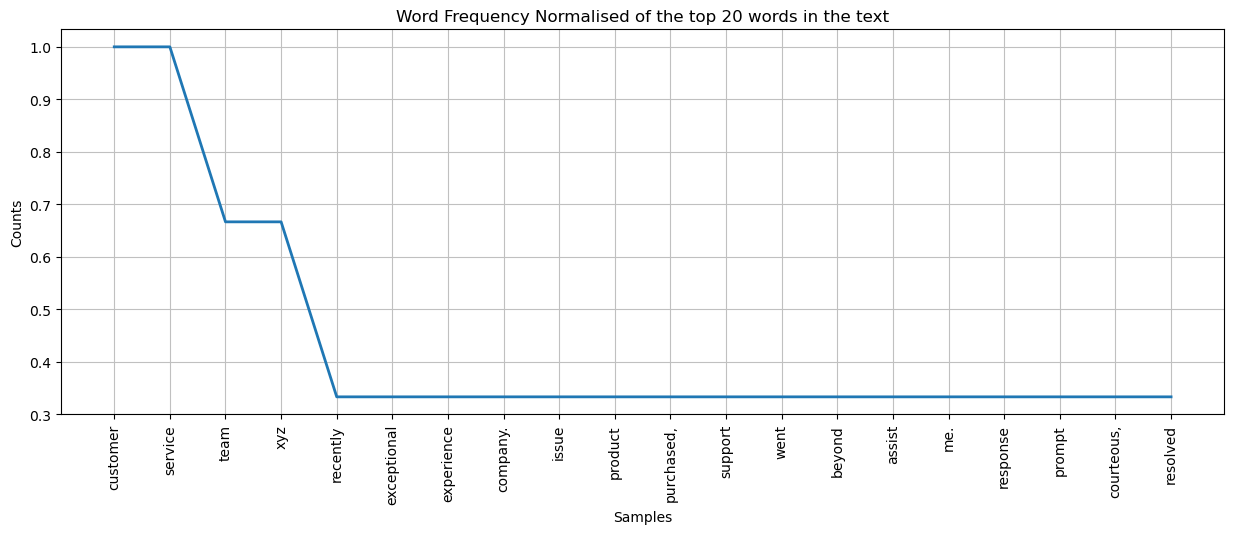

In [35]:
_ = frequency_normalized.plot(20, title="Word Frequency Normalised of the top 20 words in the text")

In [36]:
print("The 10 most occuring words in the text are: ")
for i,word in enumerate(sorted(frequency.items(), key=lambda item: item[1],reverse=True)):
    if(i > 10):
        break
    print(F"The word: \"{word[0]}\", which has a count of: {word[1]}")

The 10 most occuring words in the text are: 
The word: "customer", which has a count of: 3
The word: "service", which has a count of: 3
The word: "team", which has a count of: 2
The word: "xyz", which has a count of: 2
The word: "recently", which has a count of: 1
The word: "exceptional", which has a count of: 1
The word: "experience", which has a count of: 1
The word: "company.", which has a count of: 1
The word: "issue", which has a count of: 1
The word: "product", which has a count of: 1
The word: "purchased,", which has a count of: 1
